In [2]:
import numpy as np # Одномерные и многомерные массивы (array)
import pandas as pd # Таблицы и временные ряды (dataframe, series)
import seaborn as sns # Графика для визуализации данных
import matplotlib.pyplot as plt # Научная графика
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, Normalizer, normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# 0. Описание задачи
Набор данных IT_Cities_Property_Data, содержит комплексную информацию, связанную с недвижимостью, для крупных городов информационных технологий в Индии за 2023 год. Этот набор данных охватывает широкий спектр объектов недвижимости, включая жилье для платящих гостей (PG), комнаты и квартиры, предоставление ценной информации о рынке недвижимости этих развивающихся технологических центров.
Определить тип дома арендуемого жилья

# 1. Загрузка данных¶

In [69]:
url = 'https://raw.githubusercontent.com/Remizovatonya/machine-learning/main/IT_Cities_Property_Data.csv'
data_raw = pd.read_csv(url)

Первый и последние значения из таблицы данных

In [70]:
data_raw.head()

,id,establishedYear,title,city,description,houseType,bhkType,address,shared,bedAvailable,...,area(sq-fit),bathroomCount,furnishingType,facilities,minRent(Rs),minRoomRent(Rs),minRoomAdvance(Rs),lat,long,available_from
0,3814,NaN,102 Dhawale Residency,pune,"Located at Dhavale Vasti, Pune, this cosy 2 BH...",Gated Society Apartment,2 BHK,ghorpadi,4,0,...,1100,1,fully_furnished,['Security'],5886,12686,25372,18.526085,73.908905,2023-10-10
1,11845,NaN,R K Plaza Flat No 202,hyderabad,Looking for a charming 2 BHK independent house...,Independent House,2 BHK,kukatpally,4,0,...,1400,1,fully_furnished,"['Washing Machine', 'Fridge', 'Tv']",8550,16100,32200,17.499052,78.392693,2023-11-14
2,340222,2010.0,Satyam shivam_sion chunabhatti,mumbai,"Located at Chuna Bhatti, Mumbai, this cosy 4 B...",Independent Apartment,4 BHK,sion west,4,0,...,1200,2,fully_furnished,"['AC', 'Power Backup', 'Security', 'Washing Ma...",22250,22250,77875,19.052172,72.875252,2023-10-10
3,260247,2021.0,Kandula Vaidehi Nest_203,Bengaluru,This spacious semi_furnished 1 BHK apartment f...,Apartment,1 BHK,Murugeshpalya,1,0,...,600,1,semi_furnished,[],19000,19000,57000,12.958700,77.655403,2023-10-07
4,355316,2023.0,HNR Apartment-402,bengaluru,"This comfortable 1 BHK semi_furnished, house i...",Independent Apartment,1 BHK,mathikere,1,0,...,500,1,semi_furnished,[],10000,10000,60000,13.036417,77.557220,2023-10-07


In [71]:
data_raw.tail()

,id,establishedYear,title,city,description,houseType,bhkType,address,shared,bedAvailable,...,area(sq-fit),bathroomCount,furnishingType,facilities,minRent(Rs),minRoomRent(Rs),minRoomAdvance(Rs),lat,long,available_from
1868,303764,2020.0,Leha residency_101,hyderabad,"This comfortable 3 BHK fully_furnished, house ...",Independent House,3 BHK,gachibowli,3,0,...,1800,3,fully_furnished,"['Washing Machine', 'Fridge']",16000,16000,32000,17.439747,78.329826,2023-10-07
1869,253431,2009.0,Hritik house_2BHK,indore,This spacious semi_furnished 2 BHK independent...,Independent House,2 BHK,hilink city,2,0,...,900,2,semi_furnished,[],6000,6000,30000,22.741608,75.804863,2023-10-07
1870,269421,2015.0,Dipesh House_Lajpat Nagar,newdelhi,Looking for a spacious 2 BHK independent house...,Independent House,2 BHK,lajpat nagar 1,2,0,...,1200,1,semi_furnished,[],20450,20450,20450,28.574446,77.245575,2023-10-07
1871,337604,2015.0,Desai Nest,mumbai,"This comfortable 3 BHK fully_furnished, house ...",Independent Apartment,3 BHK,andheri west,3,0,...,1300,3,fully_furnished,"['AC', 'Security', 'Washing Machine', 'Fridge'...",46666,46666,116665,19.119131,72.842255,2023-10-10
1872,169997,NaN,Narendra Nest F07,hyderabad,Looking for a quiet STUDIO studio house for bo...,Studio,STUDIO,NaN,1,1,...,225,1,semi_furnished,[],10000,10000,20000,17.483395,78.390640,2023-10-07


Информация о датасете

In [72]:
print(data_raw.shape)
print(data_raw.columns)

(1873, 23)
Index(['id', 'establishedYear', 'title', 'city', 'description', 'houseType',
       'bhkType', 'address', 'shared', 'bedAvailable', 'roomAvailable',
       'availableFor', 'bookingType', 'area(sq-fit)', 'bathroomCount',
       'furnishingType', 'facilities', 'minRent(Rs)', 'minRoomRent(Rs)',
       'minRoomAdvance(Rs)', 'lat', 'long', 'available_from'],
      dtype='object')


In [73]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1873 non-null   int64  
 1   establishedYear     1312 non-null   float64
 2   title               1871 non-null   object 
 3   city                1873 non-null   object 
 4   description         1873 non-null   object 
 5   houseType           1872 non-null   object 
 6   bhkType             1860 non-null   object 
 7   address             1864 non-null   object 
 8   shared              1873 non-null   int64  
 9   bedAvailable        1873 non-null   int64  
 10  roomAvailable       1873 non-null   int64  
 11  availableFor        1873 non-null   object 
 12  bookingType         1850 non-null   object 
 13  area(sq-fit)        1873 non-null   int64  
 14  bathroomCount       1873 non-null   int64  
 15  furnishingType      1873 non-null   object 
 16  facili

Описание столбцов:



*   id - уникальный идентификатор (категориальный)
*   establishedYear - год постройки (категориальный)
*   title - название жилья, сдающегося в аренду (категориальный)
*   city - город, в котором находится постройка (категориальный)
*   description - описание жилья арендодателем (текстовый)
*   houseType - тип дома (категориальный)
*   bhkType - тип квартиры (категориальный)
*   address - населенный пункт (категориальный)
*   shared - количество людей, имеющих возможность расположиться в арендованном
*   жилье (количественный)
*   bedAvailable - кровати, доступные под аренду (количественный)
*   roomAvailable - комнаты, доступные под аренду (количественный)
*   availableFor - доступность по половому признаку или для семей (категориальный)
*   bookingType - тип аренды (категориальный)
*   area(sq-fit) - площадь помещения (количественный)
*   bathroomCount - количество ванных комнат (количественный)
*   furnishingType - наличие мебели (категориальный)
*   facilities - удобства (текстовый)
*   minRent(Rs) - минимальная арендная плата (рупии) (количественный)
*   minRoomRent(Rs) - минимальная арендная плата за комнату (рупии) (количественный)
*   minRoomAdvance(Rs) - минимальная предоплата за комнату (рупии) (количественный)
*   lat - широта (количественный)
*   long - долгота (количественный)
*   available_from - дата освобождения жилья (категориальный)









# 2. Визуализация данных и вычисление основных характеристик (среднее, разброс, корреляционную матрицу и т.д.). Интерпретация полученных результатов.
Выведем все диаграммы рассеивания для количественных признаков.

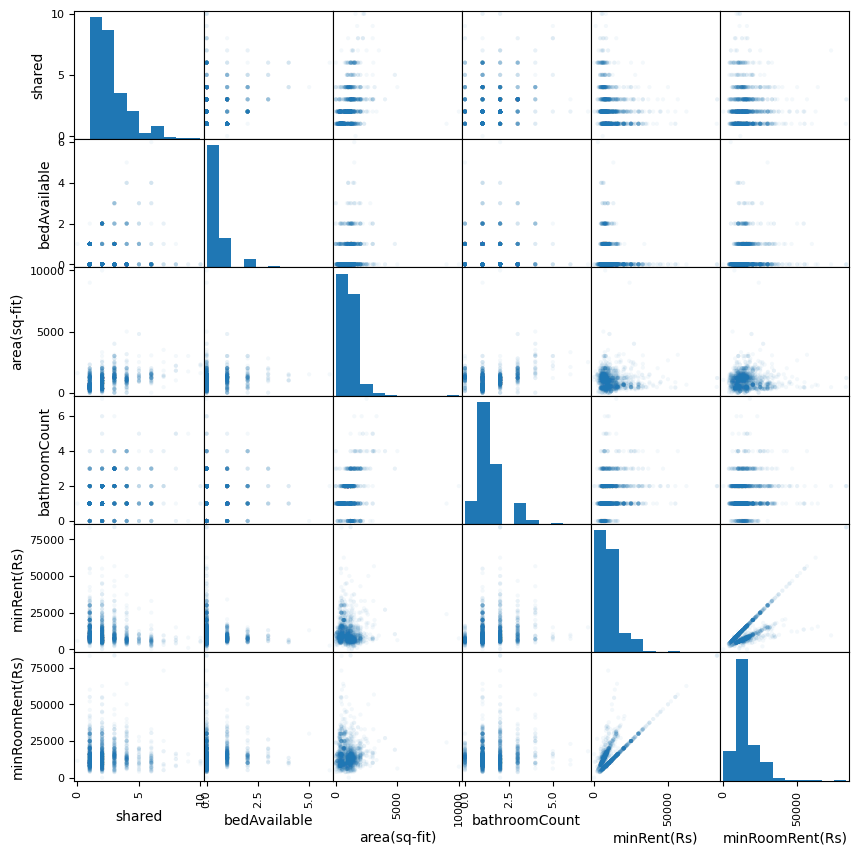

In [74]:
df = data_raw[['shared', 'bedAvailable', 'area(sq-fit)', 'bathroomCount', 'minRent(Rs)', 'minRoomRent(Rs)']].copy()
pd.plotting.scatter_matrix(df, figsize = (10, 10), alpha = 0.05)
pass

Рассмотрим соотношение классов (признак houseType)

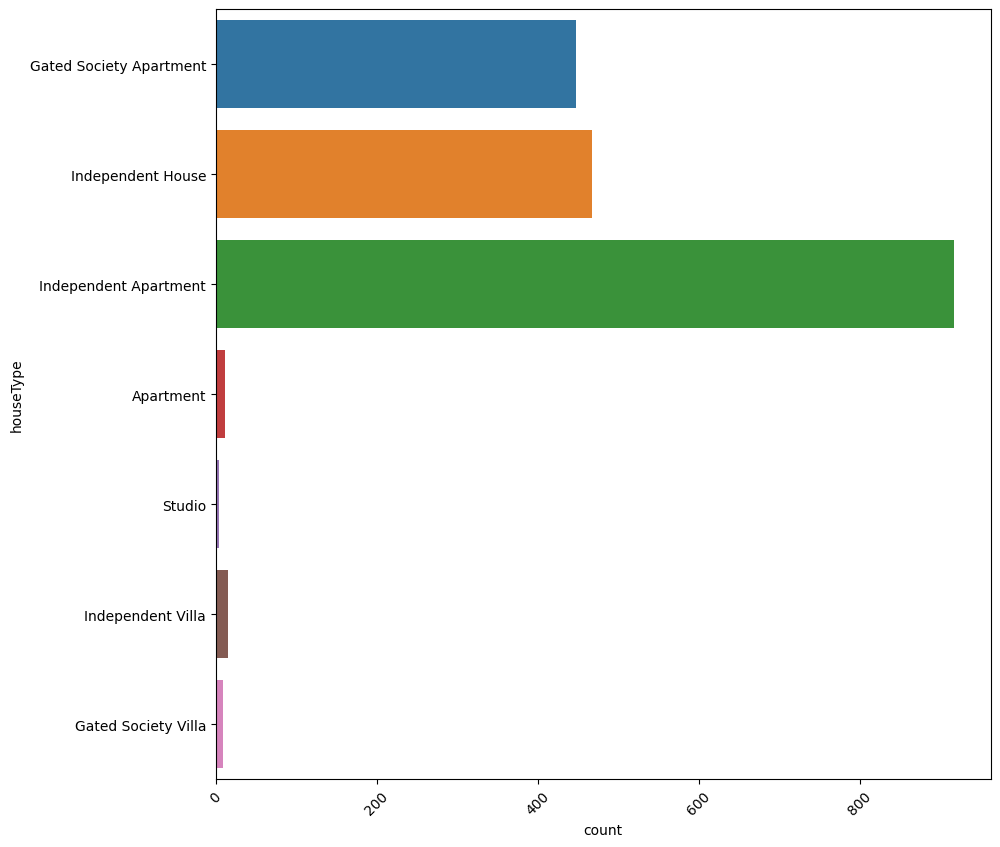

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y=data_raw['houseType'])
plt.xticks(rotation=45)
plt.show()

Из гистограммы видно, что классы несбалансированы - найдём их точное соотношение.

In [76]:
data_raw['houseType'].value_counts()

Independent Apartment      917
Independent House          468
Gated Society Apartment    447
Independent Villa           15
Apartment                   12
Gated Society Villa          9
Studio                       4
Name: houseType, dtype: int64

In [77]:
data_raw['houseType'].value_counts()[0] / (data_raw['houseType'].value_counts()[0] + data_raw['houseType'].value_counts()[1]
                                           + data_raw['houseType'].value_counts()[2] + data_raw['houseType'].value_counts()[3]
                                           + data_raw['houseType'].value_counts()[4] + data_raw['houseType'].value_counts()[5]
                                           + data_raw['houseType'].value_counts()[6]) * 100

48.98504273504273

In [78]:
data_raw['houseType'].value_counts()[1] / (data_raw['houseType'].value_counts()[0] + data_raw['houseType'].value_counts()[1]
                                           + data_raw['houseType'].value_counts()[2] + data_raw['houseType'].value_counts()[3]
                                           + data_raw['houseType'].value_counts()[4] + data_raw['houseType'].value_counts()[5]
                                           + data_raw['houseType'].value_counts()[6]) * 100

25.0

In [79]:
data_raw['houseType'].value_counts()[2] / (data_raw['houseType'].value_counts()[0] + data_raw['houseType'].value_counts()[1]
                                           + data_raw['houseType'].value_counts()[2] + data_raw['houseType'].value_counts()[3]
                                           + data_raw['houseType'].value_counts()[4] + data_raw['houseType'].value_counts()[5]
                                           + data_raw['houseType'].value_counts()[6]) * 100

23.878205128205128

In [80]:
data_raw['houseType'].value_counts()[3] / (data_raw['houseType'].value_counts()[0] + data_raw['houseType'].value_counts()[1]
                                           + data_raw['houseType'].value_counts()[2] + data_raw['houseType'].value_counts()[3]
                                           + data_raw['houseType'].value_counts()[4] + data_raw['houseType'].value_counts()[5]
                                           + data_raw['houseType'].value_counts()[6]) * 100

0.8012820512820512

In [81]:
data_raw['houseType'].value_counts()[4] / (data_raw['houseType'].value_counts()[0] + data_raw['houseType'].value_counts()[1]
                                           + data_raw['houseType'].value_counts()[2] + data_raw['houseType'].value_counts()[3]
                                           + data_raw['houseType'].value_counts()[4] + data_raw['houseType'].value_counts()[5]
                                           + data_raw['houseType'].value_counts()[6]) * 100

0.641025641025641

In [82]:
data_raw['houseType'].value_counts()[5] / (data_raw['houseType'].value_counts()[0] + data_raw['houseType'].value_counts()[1]
                                           + data_raw['houseType'].value_counts()[2] + data_raw['houseType'].value_counts()[3]
                                           + data_raw['houseType'].value_counts()[4] + data_raw['houseType'].value_counts()[5]
                                           + data_raw['houseType'].value_counts()[6]) * 100

0.4807692307692308

In [83]:
data_raw['houseType'].value_counts()[6] / (data_raw['houseType'].value_counts()[0] + data_raw['houseType'].value_counts()[1]
                                           + data_raw['houseType'].value_counts()[2] + data_raw['houseType'].value_counts()[3]
                                           + data_raw['houseType'].value_counts()[4] + data_raw['houseType'].value_counts()[5]
                                           + data_raw['houseType'].value_counts()[6]) * 100

0.2136752136752137

Вычислим основные статистические характеристики:

mean - среднее значение
std - стандартное отклонение
min - минимум
25% - нижнее значение первого квантиля
50% - медиана
75% - верхнее значение первого квантиля
max - максимум

In [84]:
data_raw.describe()

,id,establishedYear,shared,bedAvailable,roomAvailable,area(sq-fit),bathroomCount,minRent(Rs),minRoomRent(Rs),minRoomAdvance(Rs),lat,long
count,1873.000000,1312.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000
mean,227002.531233,2015.743140,2.227977,0.338494,1.397224,978.972237,1.424987,11135.791778,15192.490657,38751.866524,17.959152,76.572574
std,135164.128706,14.620509,1.437749,0.680699,0.941240,654.465355,0.916874,7724.231629,8269.362522,44674.184413,5.428525,2.014396
min,135.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.781008,72.810486
25%,68371.000000,2013.000000,1.000000,0.000000,1.000000,500.000000,1.000000,6500.000000,10000.000000,20000.000000,12.973643,73.962463
50%,277543.000000,2019.000000,2.000000,0.000000,1.000000,950.000000,1.000000,8735.000000,13500.000000,28000.000000,17.471685,77.499657
75%,353723.000000,2020.000000,3.000000,0.000000,2.000000,1300.000000,2.000000,13000.000000,17750.000000,40800.000000,19.164930,77.673416
max,361277.000000,2023.000000,10.000000,6.000000,6.000000,10000.000000,7.000000,83333.000000,83333.000000,600000.000000,28.741781,80.261124


Вычислим матрицу корреляции для количественных признаков

In [85]:
corr_mat = df.corr()
corr_mat

,shared,bedAvailable,area(sq-fit),bathroomCount,minRent(Rs),minRoomRent(Rs)
shared,1.000000,0.118697,0.389191,0.234843,-0.192118,-0.028543
bedAvailable,0.118697,1.000000,0.196954,0.017596,-0.193190,0.051211
area(sq-fit),0.389191,0.196954,1.000000,0.337308,-0.060115,-0.000316
bathroomCount,0.234843,0.017596,0.337308,1.000000,0.171371,0.085206
minRent(Rs),-0.192118,-0.193190,-0.060115,0.171371,1.000000,0.765782
minRoomRent(Rs),-0.028543,0.051211,-0.000316,0.085206,0.765782,1.000000


<Axes: >

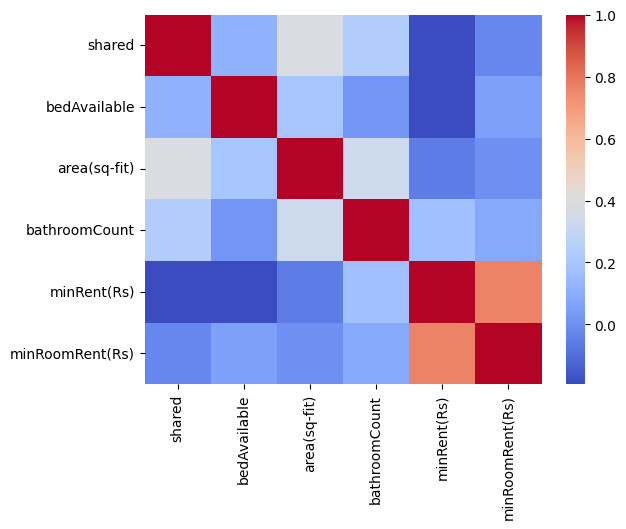

In [86]:
sns.heatmap(corr_mat, cmap='coolwarm')

Корреляция присутствует по всем признакам

# 3. Борьба с пропущенными значениями
Для этого посмотрим все пропущенные значения по всем стоблцам

Text(0.5, 80.7222222222222, 'Missing Values')

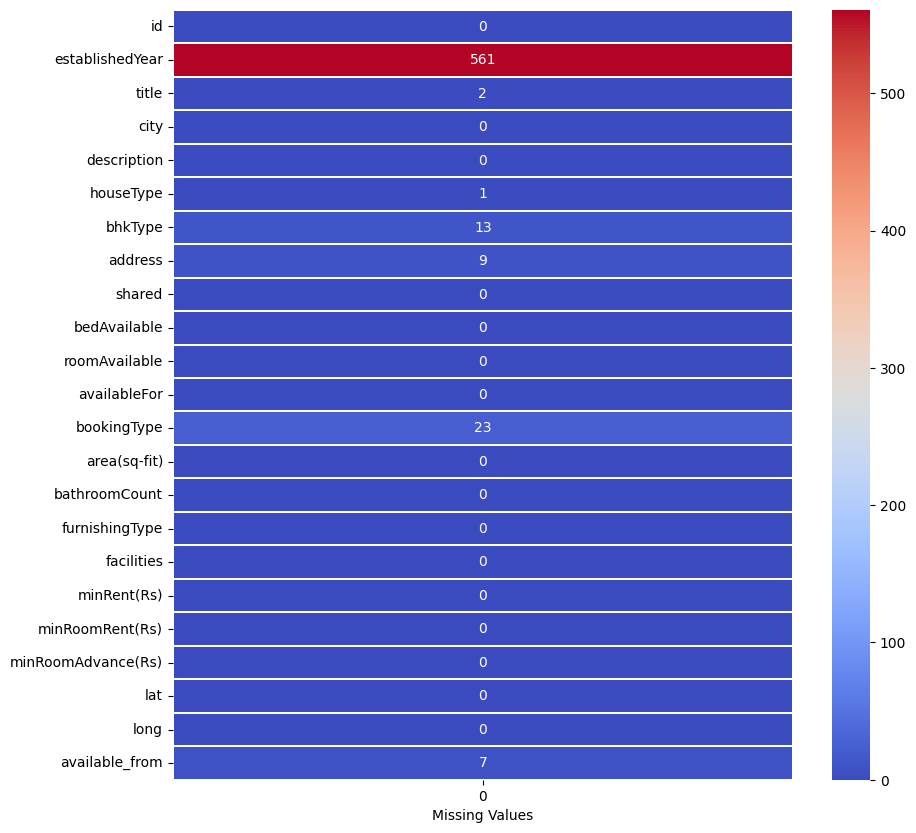

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data_raw.isna().sum().to_frame(), annot=True, fmt='d',cmap='coolwarm', linewidths=.2)
ax.set_xlabel("Missing Values")

Все пропущенные значения заполним часто встречающимися

In [88]:
imputer_cols = ['establishedYear', 'title', 'houseType', 'bhkType', 'address', 'bookingType', 'available_from']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data_raw[imputer_cols])
data_raw[imputer_cols] = imputer.transform(data_raw[imputer_cols])

Снова проверим таблицу на наличие пропущенных значений

Text(0.5, 80.7222222222222, 'Missing Values')

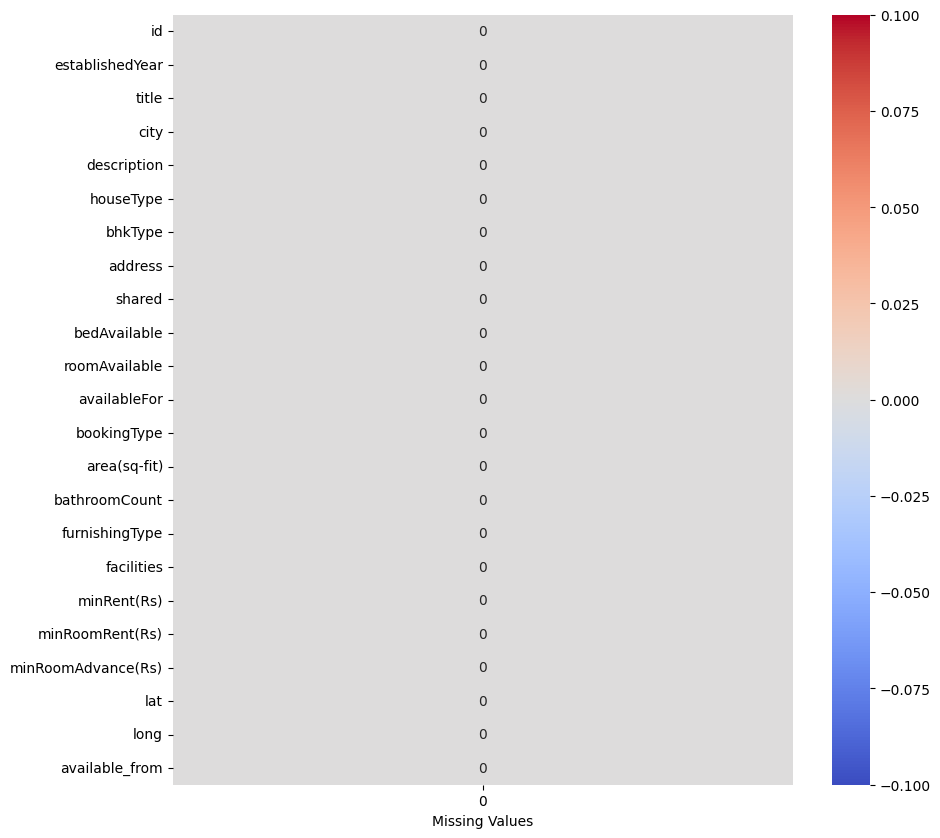

In [89]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data_raw.isna().sum().to_frame(), annot=True, fmt='d',cmap='coolwarm')
ax.set_xlabel("Missing Values")

Пропущенные значения отсутствуют

# 4. Обработка категориальных признаков

In [90]:
for i in data_raw:
    if data_raw[i].dtypes == 'object':
        data_raw[i] = LabelEncoder().fit_transform(data_raw[i])

data_raw

,id,establishedYear,title,city,description,houseType,bhkType,address,shared,bedAvailable,...,area(sq-fit),bathroomCount,furnishingType,facilities,minRent(Rs),minRoomRent(Rs),minRoomAdvance(Rs),lat,long,available_from
0,3814,32,42,10,93,1,4,128,4,0,...,1100,1,0,58,5886,12686,25372,18.526085,73.908905,4
1,11845,32,1026,5,457,4,4,238,4,0,...,1400,1,0,91,8550,16100,32200,17.499052,78.392693,38
2,340222,22,1235,7,80,3,6,459,4,0,...,1200,2,0,9,22250,22250,77875,19.052172,72.875252,4
3,260247,33,689,0,1512,0,1,5,1,0,...,600,1,1,95,19000,19000,57000,12.958700,77.655403,1
4,355316,35,558,2,1078,3,1,279,1,0,...,500,1,1,95,10000,10000,60000,13.036417,77.557220,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,303764,32,750,5,1144,4,5,120,3,0,...,1800,3,0,92,16000,16000,32000,17.439747,78.329826,1
1869,253431,21,624,6,1540,4,4,157,2,0,...,900,2,1,95,6000,6000,30000,22.741608,75.804863,1
1870,269421,27,438,8,702,4,4,241,2,0,...,1200,1,1,95,20450,20450,20450,28.574446,77.245575,1
1871,337604,27,420,7,1149,3,5,21,3,0,...,1300,3,0,15,46666,46666,116665,19.119131,72.842255,4


# 5. Проведение нормализации
Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из трех следующих способов:

приведение к отрезку [0,1] - это линейное преобразование, приводящее все значения к заданному отрезку; стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению; нормализация - приведение данных к единичной норме.

Выполним стандартизацию всех признаков:

In [91]:
data_numeric = df
for i in data_raw:
    if i in data_numeric:
        data_raw[i] = (data_raw[i]-data_raw[i].mean())/data_raw[i].std()
data_raw

,id,establishedYear,title,city,description,houseType,bhkType,address,shared,bedAvailable,...,area(sq-fit),bathroomCount,furnishingType,facilities,minRent(Rs),minRoomRent(Rs),minRoomAdvance(Rs),lat,long,available_from
0,3814,32,42,10,93,1,4,128,1.232498,-0.497274,...,0.184926,-0.463517,0,58,-0.679652,-0.303106,25372,18.526085,73.908905,4
1,11845,32,1026,5,457,4,4,238,1.232498,-0.497274,...,0.643316,-0.463517,0,91,-0.334764,0.109744,32200,17.499052,78.392693,38
2,340222,22,1235,7,80,3,6,459,1.232498,-0.497274,...,0.337723,0.627146,0,9,1.438876,0.853453,77875,19.052172,72.875252,4
3,260247,33,689,0,1512,0,1,5,-0.854096,-0.497274,...,-0.579056,-0.463517,1,95,1.018122,0.460436,57000,12.958700,77.655403,1
4,355316,35,558,2,1078,3,1,279,-0.854096,-0.497274,...,-0.731853,-0.463517,1,95,-0.147043,-0.627919,60000,13.036417,77.557220,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,303764,32,750,5,1144,4,5,120,0.536967,-0.497274,...,1.254501,1.717808,0,92,0.629734,0.097651,32000,17.439747,78.329826,1
1869,253431,21,624,6,1540,4,4,157,-0.158565,-0.497274,...,-0.120667,0.627146,1,95,-0.664894,-1.111632,30000,22.741608,75.804863,1
1870,269421,27,438,8,702,4,4,241,-0.158565,-0.497274,...,0.337723,-0.463517,1,95,1.205843,0.635782,20450,28.574446,77.245575,1
1871,337604,27,420,7,1149,3,5,21,0.536967,-0.497274,...,0.490519,1.717808,0,15,4.599837,3.806038,116665,19.119131,72.842255,4


# 6. Разбиение данных на обочуающую и тестовую выборки¶

In [92]:
data_raw['houseType'].value_counts()

3    918
4    468
1    447
5     15
0     12
2      9
6      4
Name: houseType, dtype: int64

In [93]:
x = data_raw.drop(['houseType'], axis=1)
y = data_raw['houseType']

Разобьем данные на обучающую и тестовую выборки следующим образом: 70% - обучающая выборка, 30% - тестовая.

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 52)

N_train, _ = x_train.shape
N_test,  _ = x_test.shape

N_train, N_test

(1311, 562)

# 7. Обучение выборки

In [95]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("The training accuracy for KNN is:", round(knn.score(x_train, y_train)*100, 4), "%")
print("The testing accuracy for KNN is:", round(knn_acc * 100,2), "%")

The training accuracy for KNN is: 71.3959 %
The testing accuracy for KNN is: 56.05 %


Классификатор ближайших соседей

In [96]:
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 25, 35, 45, 55]
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=2)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.43782582386892566 25


0.43782582386892566 25
Оптимальное число соседей: 25

Ошибка на обучающей выборке: 0.43782582386892566

Random forest

In [128]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
print("The training accuracy for Random Forest is:", round(rfc.score(x_train, y_train)*100,2), "%")
print("The testing accuracy for Random Forest is:", round(rfc_acc * 100,2), "%")

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 81.14 %


8. Общие выводы
Для выполнении задания был использован датасет INDIAN IT CITIES PROPERTY 2023. Была поставлена задача определить тип жилья, сдаваемого под аренду по представленным критериям.

В ходе работы были выполнены следующие задачи:

Описана задача, прочитаны данные, визуализированы данные и вычислены основные характеристики, обработаны пропущенные значения, обработаны категориальные признаки, проведена нормализация, данные разбиты на обучающую и тестовую выборки, запущен классификатор ближайших соседей для разных количеств, вычислена ошибка на обучающей и тестовой выборках, запущен классификатор rendom forest, вычислен результат, сделаны выводы

Датасет имеет несбалансированные классы:

49.0 - Independent Apartment
25.0 - Independent House
23.8 - Gated Society Apartment
0.9 - Independent Villa
0.6 - Apartment
0.5 - Gated Society Villa
0.2 - Studio

Классификатор ближайших соседей был запущен при разных значениях параметра k - числа соседей с целью определить оптимальный. Оптимальное число соседей: 25. Ошибка на тестовой выборке при этом параметре: 0.43782582386892566.

Данный метод классификации объектов не подходит для данной задачи, т.к ошибка классификации объектов достаточно большая.

Классификатор Random Forest дает резальтат на тестовой выборке 82,21%, что гораздо лучше, чем в предыдущем варианте

# Домашнее задание №2
Отметим что классификатор RandomForest был нами реализован в прошлом домашнем задании, мы только добавили для него confusion matrix

Импортируем все необходимые нам библиотеки

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier


# 1.Random Forest

In [254]:
hidden_layer = np.arange(1, 30)
depth = np.arange(1, 30)
error_train = []
error_test = []
for d in depth:
    rf_model = RandomForestClassifier(max_depth = d, random_state=0)
    rf_model.fit(x_train, y_train)

    rf_pred_train = rf_model.predict(x_train)
    rf_pred_test = rf_model.predict(x_test)

    error_train.append(np.mean(y_train != rf_pred_train))
    error_test.append(np.mean(y_test != rf_pred_test))

График зависимости ошибки от количества нейронов:

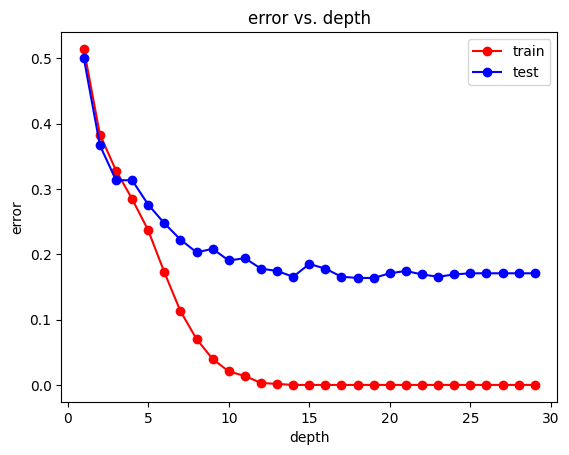

In [255]:
plt.plot(hidden_layer, error_train, 'r-o', label = 'train')
plt.plot(hidden_layer, error_test, 'b-o', label = 'test')
plt.title('error vs. depth')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()

Минимальная ошибка на обучающей и тестовой выборках:

In [256]:
min_error_train = np.min(error_train)
min_error_test = np.min(error_test)
print("Минимальная ошибка на обучающей выборке: ", min_error_train)
print("Минимальная ошибка на тестовой выборке: ", min_error_test)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.16370106761565836


Максимальная глубина дерева, при достижении наименьшей ошибки:

In [257]:
opt_dep = depth[error_test == min_error_test]
print(opt_dep)

[18 19]


Оценка точности

In [258]:
rf_acc = accuracy_score(y_test, rf_pred_test)
print("The training accuracy for Random Forest is:", round(rf_model.score(x_train, y_train)*100,2), "%")
print("The testing accuracy for Random Forest is:", round(rf_acc * 100,2), "%")

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 82.92 %


Матрица несоответствий

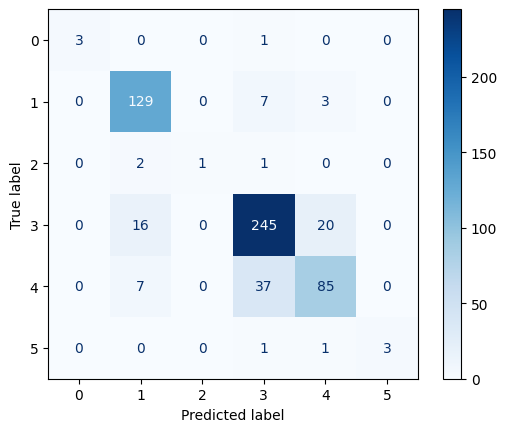

In [260]:
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, cmap=plt.cm.Blues)

Модель определила:
*   3 объекта Apartment, которые действительно были Apartment
*   154 объекта Gated Society Apartment, 129 из которых действительно были Gated Society Apartment
*   1 объекта Gated Society Villa, который действительно был Gated Society Villa
*   292 объектов Independent Apartment, 245 из которых действительно были Independent Apartment
*   109 объектов Independent House, 85 из которых действительно были Independent House
*   3 объекта Independent Villa, которые действительно были Independent Villa

# 2.Логистическая регрессия

In [228]:
error_train = []
error_test = []
lr_model = LogisticRegression(solver='newton-cholesky', max_iter=10000)
lr_model.fit(x_train, y_train)
lr_pred_train = lr_model.predict(x_train)
lr_pred_test = lr_model.predict(x_test)

error_train = np.mean(y_train != lr_pred_train)
error_test = np.mean(y_test  != lr_pred_test)

print("Ошибка на обучающей выборке: ", error_train)
print("Ошибка на тестовой выборке: ", error_test)

Ошибка на обучающей выборке:  0.3707093821510298
Ошибка на тестовой выборке:  0.37544483985765126


Оценка точности

In [230]:
lr_acc = accuracy_score(y_test, lr_pred_test)
print("The training accuracy for Logistic Regression is:", round(lr_model.score(x_train, y_train)*100), "%")
print("The testing accuracy for Logistic Regression is:", round(lr_acc * 100), "%")

The training accuracy for Logistic Regression is: 63 %
The testing accuracy for Logistic Regression is: 62 %


Матрица несоответствий

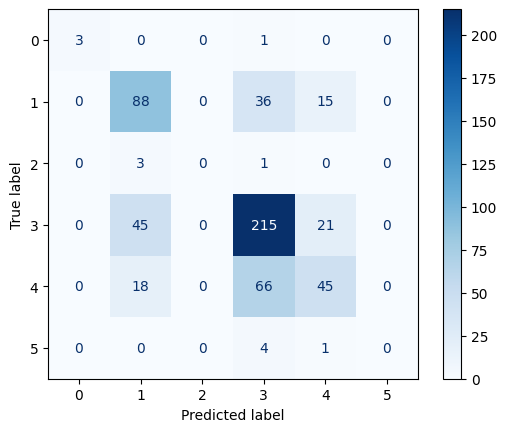

In [231]:
ConfusionMatrixDisplay.from_estimator(lr_model, x_test, y_test, cmap=plt.cm.Blues)

В модели заметно увеличись показатели FP (классификатор неверно относит объекты к рассматриваемому классу)

По Apartment, Gated Society Villaи Independent Villa показатели пропали


# 3.Полносвязная нейронная сеть c 1-м скрытым слоем

In [245]:
hidden_layer = np.arange(1, 100, 2)
error_train = []
error_test = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ),
                          solver='adam',
                          activation='relu',
                          max_iter=1000,
                          random_state = 12432)
    mlp_model.fit(x_train, y_train)

    mlp_pred_train = mlp_model.predict(x_train)
    mlp_pred_test = mlp_model.predict(x_test)
    error_train.append(np.mean(y_train != mlp_pred_train))
    error_test.append(np.mean(y_test != mlp_pred_test))

График зависимости ошибки от количества нейронов:

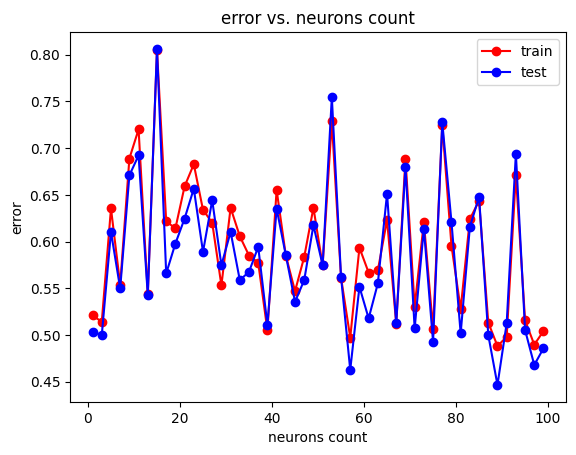

In [246]:
plt.plot(hidden_layer, error_train, 'r-o', label = 'train')
plt.plot(hidden_layer, error_test, 'b-o', label = 'test')
plt.title('error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

Минимальная ошибка на обучающей и тестовой выборке

In [247]:
min_error_train = np.min(error_train)
min_error_test = np.min(error_test)
print("Минимальная ошибка на обучающей выборке: ", min_error_train)
print("Минимальная ошибка на тестовой выборке: ", min_error_test)

Минимальная ошибка на обучающей выборке:  0.4881769641495042
Минимальная ошибка на тестовой выборке:  0.44661921708185054


Количество нейронов для достижения наименьше ошибки

In [248]:
opt_neuron = hidden_layer[error_test == min_error_test]
print(opt_neuron)

[89]


Наименьшая ошибка в тестовой выборке достигается при 18 нейронах в слое

Оценка точности

In [249]:
mlp_acc = accuracy_score(y_test, mlp_pred_test)
print("The training accuracy for Logistic Regression is:", round(mlp_model.score(x_train, y_train)*100), "%")
print("The testing accuracy for Logistic Regression is:", round(mlp_acc * 100), "%")

The training accuracy for Logistic Regression is: 50 %
The testing accuracy for Logistic Regression is: 51 %


Матрица несоответствий

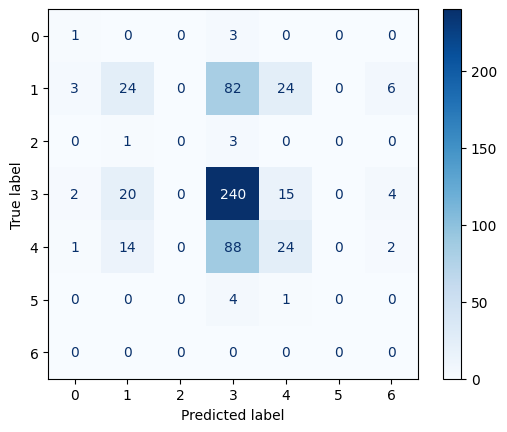

In [250]:
ConfusionMatrixDisplay.from_estimator(mlp_model, x_test, y_test, cmap=plt.cm.Blues)

Увеличились показатели FP для всех классов, кроме того, по некоторым классам они стали превосходить показатели TP

Теперь Во всех классах, кроме самых многочисленных TP меньше всех остальных метрик

# Выводы

Сравним ошибки на тестовых выборках у рассмотренных классификаторов:

рандомный лес: 0.16370106761565836

логистическая регрессия: 0.37544483985765126

полносвязная нейронная сеть: 0.44661921708185054

Наименьшая ошибка на тестовой выборке наблюдается у рандомного леса.

Сравним наглядно матрицы несоответствия:

Text(0.5, 1.0, 'полносвязная нейронная сеть')

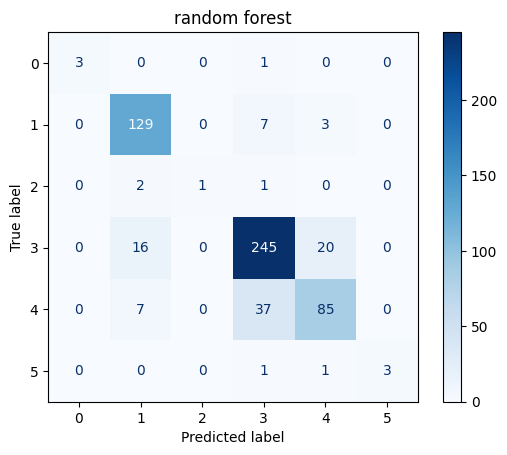

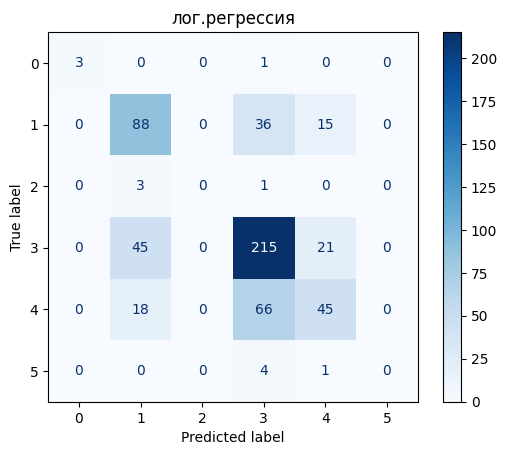

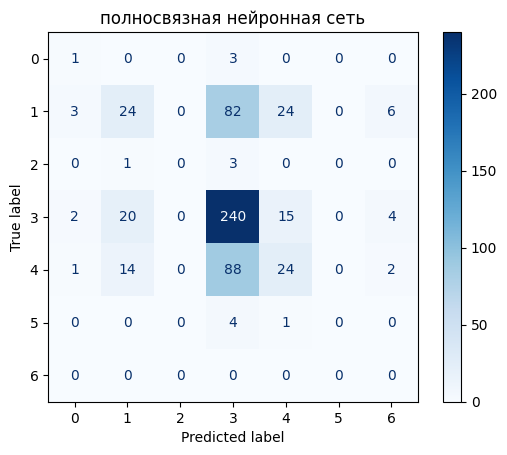

In [261]:
disp3 = ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, cmap=plt.cm.Blues)
disp3.ax_.set_title("random forest")

disp2 = ConfusionMatrixDisplay.from_estimator(lr_model, x_test, y_test, cmap=plt.cm.Blues)
disp2.ax_.set_title("лог.регрессия")

disp4 = ConfusionMatrixDisplay.from_estimator(mlp_model, x_test, y_test, cmap=plt.cm.Blues)
disp4.ax_.set_title("полносвязная нейронная сеть")

Рандомный лес лучше других рассмотренных классификаторов с большей точностью определяет те типы домов, к которым они действительно принадлежат (true positive)

Принадлежащие к классу типы определаются в rf с точностью
Pressision :
1/6(1+129/154+1+245/292+85/109+1) = 0.91

В логистической регрессии - 0.63
В полносвязной нейронной сети - 0.51


